<a href="https://colab.research.google.com/github/siddhant-shekhar/bank_customer_churn/blob/main/bank_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [4]:
# importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# dividing the dataset into features and targets

X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
# feature engineering

geography = pd.get_dummies(X['Geography'], drop_first= True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [8]:
# concate the dummies in the dataframe
X = X.drop(['Geography', 'Gender'], axis = 1)

pd.concat([X, geography, gender], axis =1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [9]:
X = pd.concat([X, geography, gender], axis =1)

In [13]:
# splitting into train test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
# feature scaaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
############### ANN ####################

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU, LeakyReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [18]:
# Initialize the ANN

classifier = Sequential()

In [19]:
#adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [20]:
# adding first hidden layer
classifier.add(Dense(units= 7, activation = 'relu'))

In [21]:
# adding second hidden layer
classifier.add(Dense(units= 6, activation = 'relu'))

In [24]:
# adding the output layer
classifier.add(Dense(units = 1, activation='sigmoid'))

In [25]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [26]:
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
# Early stoppping

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [28]:
from keras.api._v2.keras import callbacks
model_history = classifier.fit(X_train, y_train, validation_split= 0.33, batch_size = 10, epochs =1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 10s 5ms/step - loss: 0.4602 - accuracy: 0.7962 - val_loss: 0.4480 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4330 - accuracy: 0.7962 - val_loss: 0.4297 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4116 - accuracy: 0.8057 - val_loss: 0.4067 - val_accuracy: 0.8292
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3929 - accuracy: 0.8362 - val_loss: 0.4087 - val_accuracy: 0.8167
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3797 - accuracy: 0.8451 - val_loss: 0.3931 - val_accuracy: 0.8338
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3670 - accuracy: 0.8528 - val_loss: 0.3848 - val_accuracy: 0.8391
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3612 - accuracy: 0.8526 - val_loss: 0.3724 - val_accuracy

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

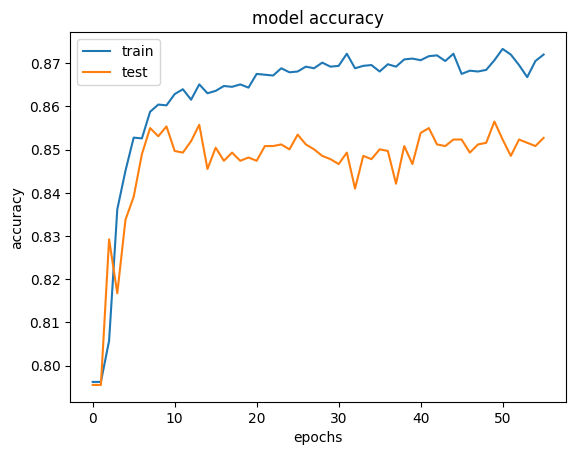

In [30]:
# summarize history fro accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

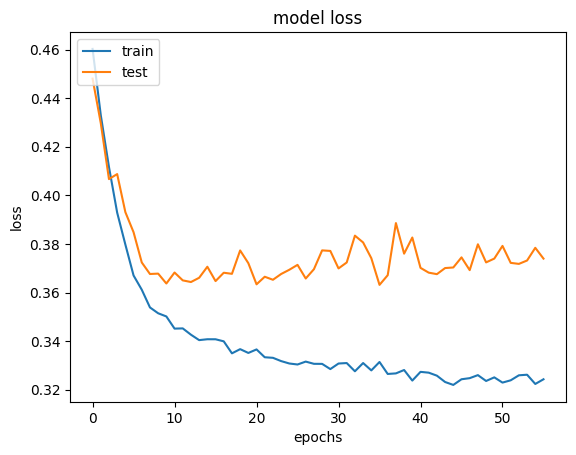

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

In [32]:
# prediction

y_pred = classifier.predict(X_test)
y_pred = (y_pred >=0.5)

63/63 [==============================] - 0s 2ms/step


In [33]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm

array([[1548,   47],
       [ 231,  174]])

In [34]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred)

score

0.861

In [35]:
# getting the weights

classifier.get_weights()

[array([[ 0.62515694, -1.4882773 ,  1.901147  ,  0.16453521,  0.56546474,
          0.02813817, -0.32764617,  0.5872365 ,  0.17418446, -1.467984  ,
          0.09663792],
        [ 2.717031  ,  2.0766015 , -5.3441176 , -0.9697109 ,  2.7442315 ,
         -0.85662615, -1.3503469 , -4.3322906 , -3.2840538 , -3.5743856 ,
         -3.3942251 ],
        [-2.0354023 ,  1.6364604 ,  0.10770185,  1.8181934 , -0.4360565 ,
          0.65911597,  0.5807843 ,  0.0320107 ,  0.04644313, -0.0630676 ,
         -0.27416897],
        [ 0.7667455 , -3.0164986 , -0.9653133 ,  0.02360634,  0.12120956,
         -3.3075025 , -0.31281924, -2.3651714 , -1.8053685 ,  2.1568406 ,
          0.10412283],
        [ 0.31482252,  0.4636764 , -1.5426023 , -1.4609616 , -0.28046215,
         -5.1491623 ,  4.678841  , -0.7353989 ,  1.3015414 ,  1.0057144 ,
         -0.87538946],
        [-0.86823094,  0.5973425 ,  0.12742123,  0.24161051,  0.3578247 ,
          0.04490992,  0.7548255 ,  0.43191263, -0.6178863 ,  0.0335777